#Business Problem Understanding

Suatu Perusahaan E-Commerce ingin mengetahui pelanggan yang akan melakukan Churn berdasarkan kebiasaan pelanggan. Perusahaan tersebut sudah melakukan pencatatan data yang mungkin memiliki korelasi seorang pelanggan akan melakukan churn atau tidak. Perusahaan tersebut ingin mengetahui lebih detail lagi kebiasaan pelanggan yang melakukan churn. Sehingga, perusahaan dapat melakukan pencegahan terhadap user yang ingin melakukan churn dengan cara memberikan beberapa promo.

# Data

In [2]:
from google.colab import drive
import pandas as pd
import numpy as np 
drive.mount('/content/drive')
path = "/content/drive/MyDrive/data_ecommerce_customer_churn.csv"
df = pd.read_csv(path, encoding='windows-1252', on_bad_lines='skip') #, encoding='windows-1252'
# df = pd.read_excel(r"I:\My Drive\4. DATASET\Dataset for ML Exercise\Boston.xlsx")

df.head()

Mounted at /content/drive


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[9.0, 5.0]"
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 15.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[6, 5]"
3,PreferedOrderCat,object,0,0.00,6,"[Grocery, Mobile Phone]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1]"
5,MaritalStatus,object,0,0.00,3,"[Divorced, Married]"
6,NumberOfAddress,int64,0,0.00,14,"[1, 9]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[18.0, 15.0]"
9,CashbackAmount,float64,0,0.00,2335,"[189.66, 227.74]"


Data Kosong


In [5]:
df.isna().sum().sum()

576

In [6]:
df.isna().sum()/df.shape[0]*100

Tenure                      4.922608
WarehouseToHome             4.288252
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
DaySinceLastOrder           5.404720
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64

In [7]:
print('total missing value (percentage)',(df.isnull().sum().sum()/len(df))*100)

total missing value (percentage) 14.615579802080692


Persentase missing value cukup kecil yaitu sebesar **14.61 %**

> ## EDA

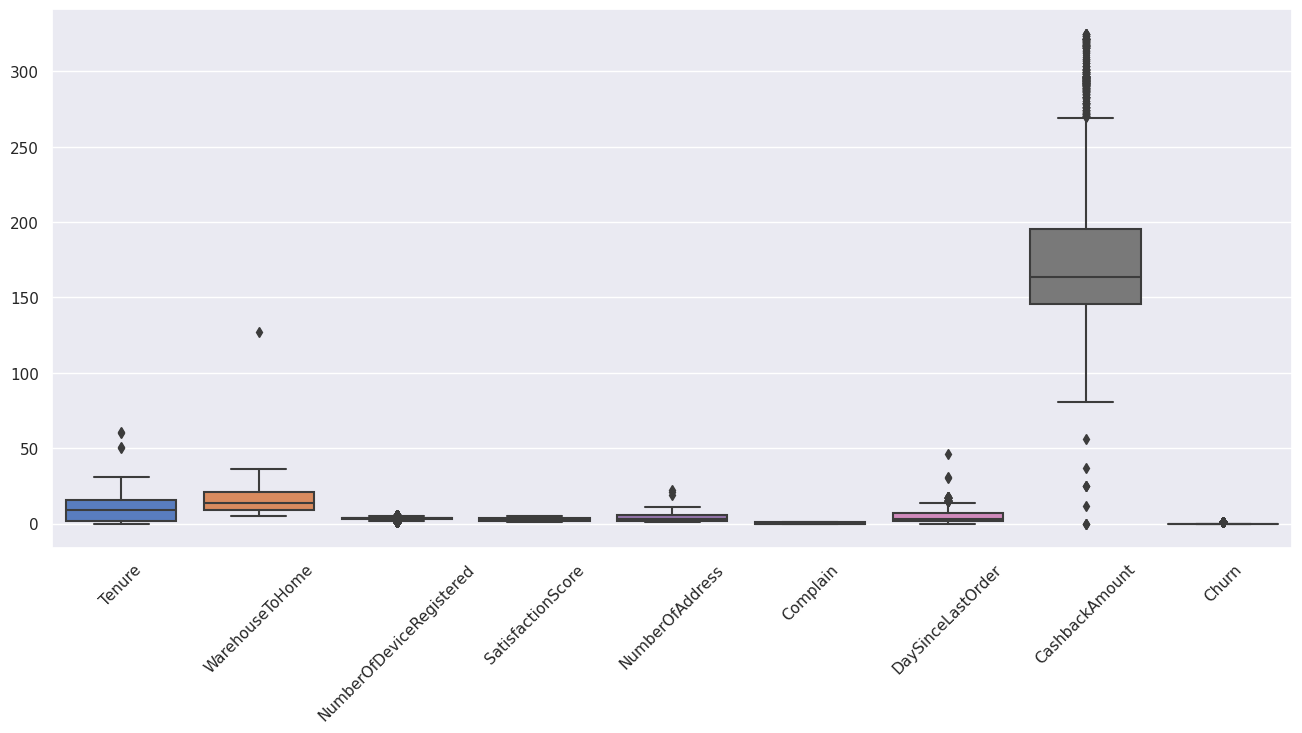

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [9]:
cat = df.select_dtypes(include='object').columns #object type columns
num = list(df.select_dtypes(exclude='object').columns) #numerical type columns
num.remove('Churn')
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

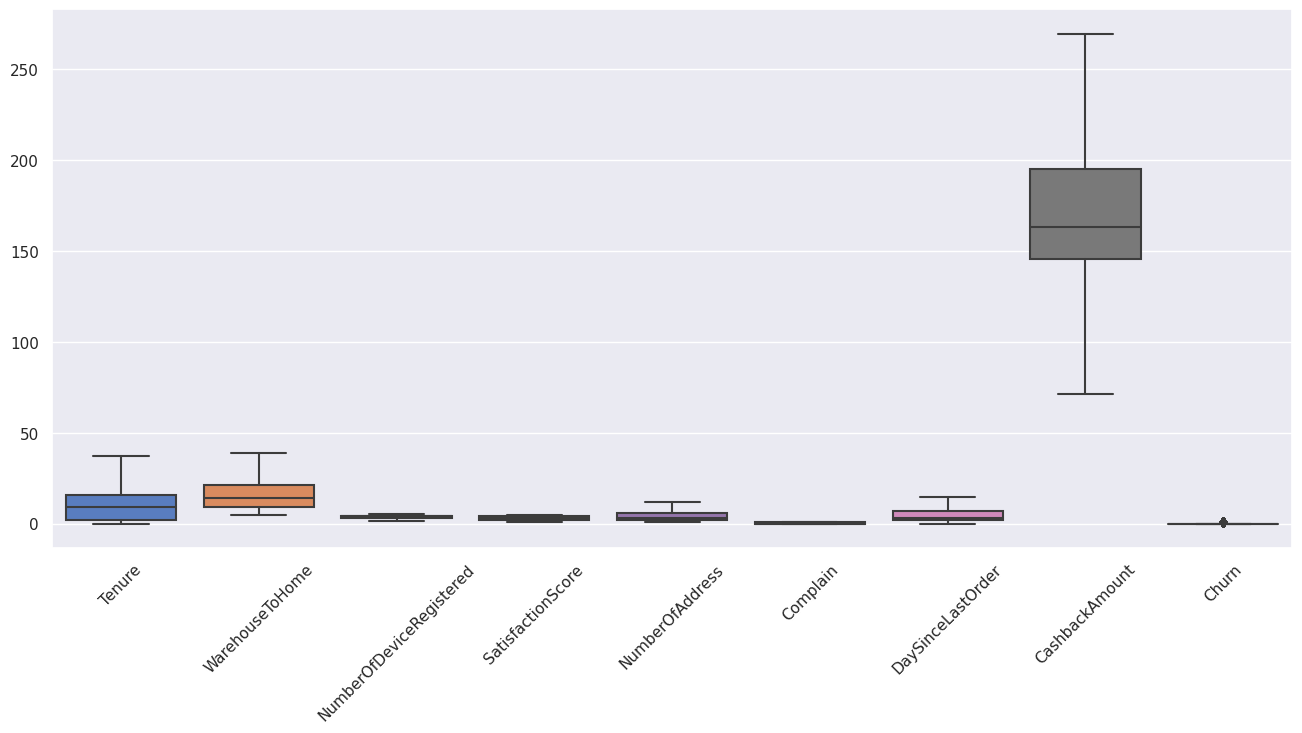

In [10]:
sns.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-9c6341129cc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.zeros_like(df.corr())
<ipython-input-11-9c6341129cc6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')


<Axes: >

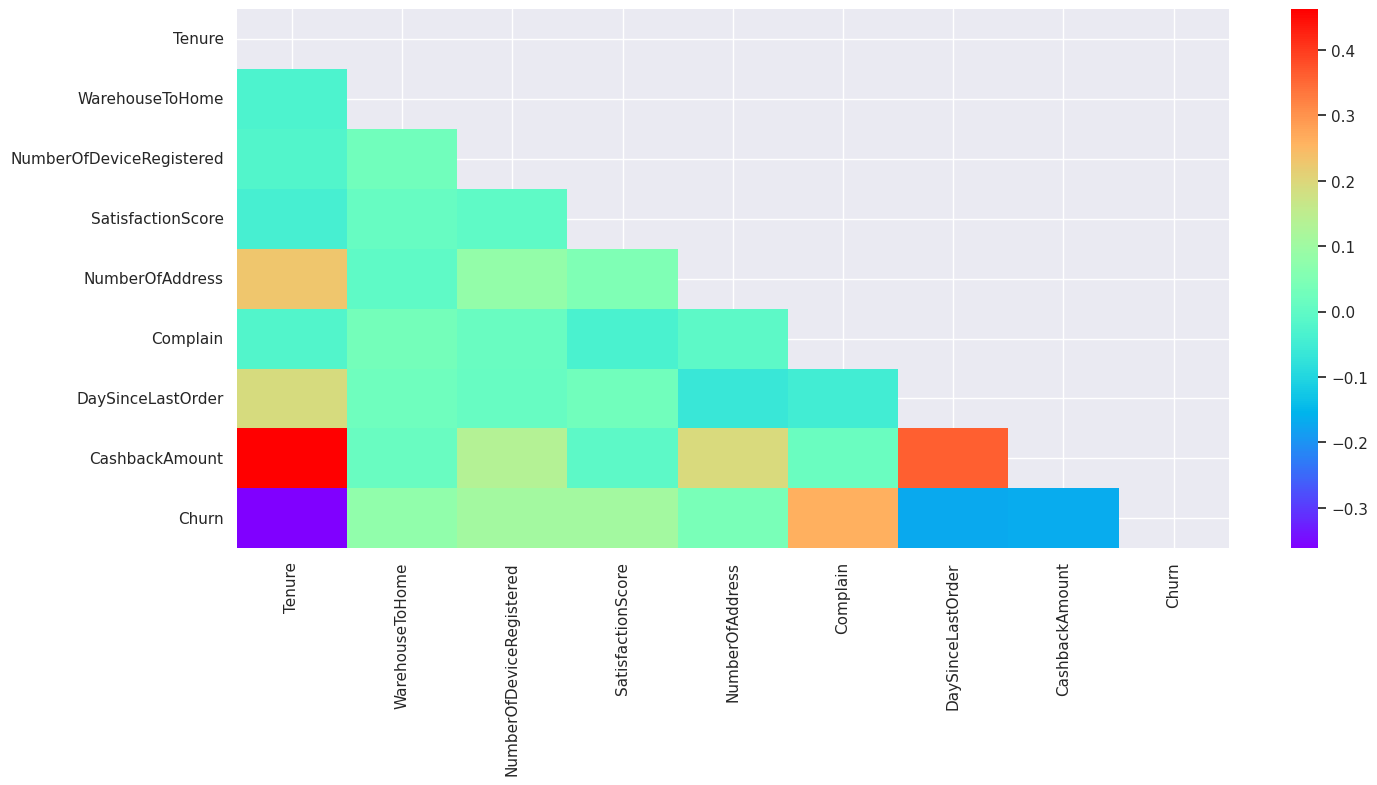

In [11]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')

Dapat dilihat dari heatmap diatas bahwa Complain memiliki korelasi yang cukup kuat dengan kolom Churn. Secara logika, hal tersebut dapat diterima. Karena, bisa saja semakin banyak complain maka semakin besar jumlah Churn user. Sedangkan semakin sedikit complain maka semakin kecil juga jumlah Churn user.

# Data Analysis

> ## Percentage Churn User with pie plot

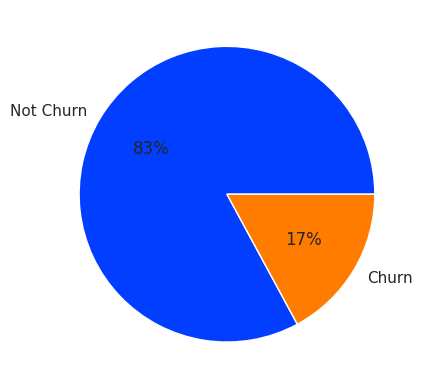

In [12]:
Not_Churn = df.loc[df['Churn']==0]['Churn'].count()
Churn = df.loc[df['Churn']==1]['Churn'].count()
import matplotlib.pyplot as plt
import seaborn as sns

data = [Not_Churn,Churn]
labels = ['Not Churn', 'Churn']
colors = sns.color_palette('bright')[0:7]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

> ## Percetage Churn User Based on Tenure with Barplot


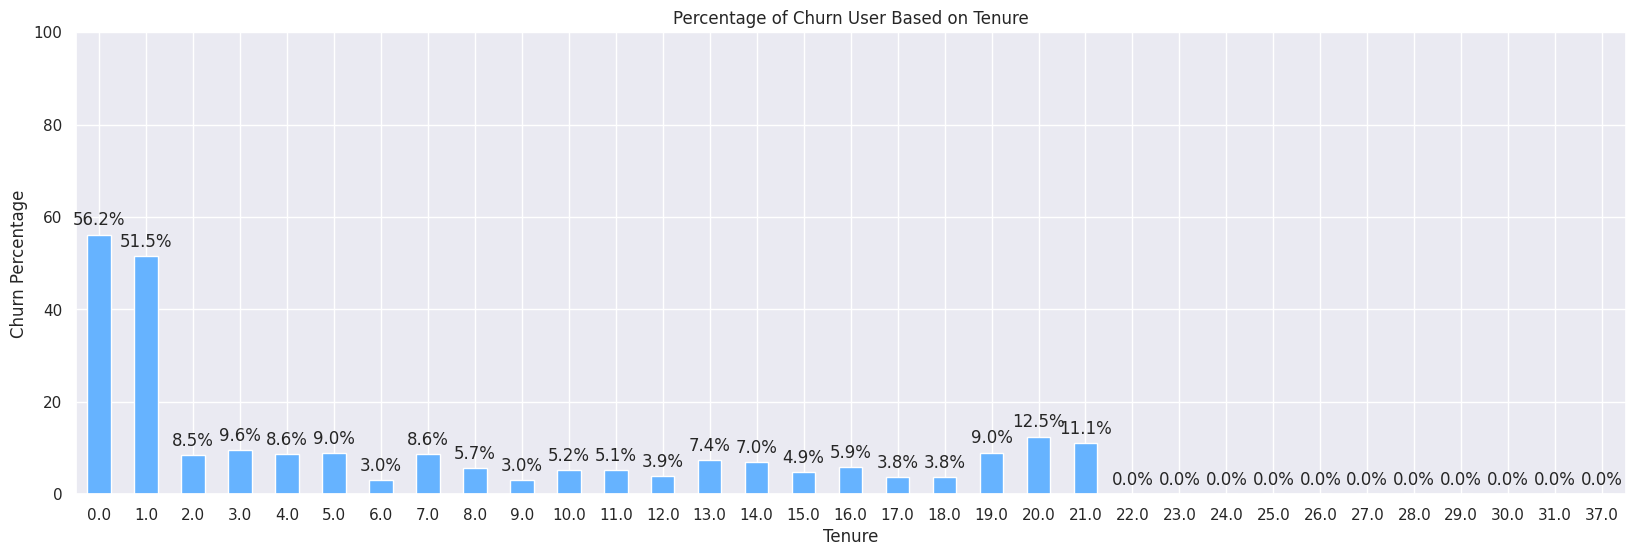

In [13]:
# Calculate percentage of churn user for each tenure
tenure_churn_percentage = df.groupby('Tenure')['Churn'].mean() * 100

# Plotting bar plot
plt.figure(figsize=(20, 6))  # Adjust figure size as needed
tenure_churn_percentage.plot(kind='bar', color='#66b3ff')

# Customize the plot
plt.xlabel('Tenure')
plt.ylabel('Churn Percentage')
plt.title('Percentage of Churn User Based on Tenure')
plt.xticks(rotation=0)
plt.ylim([0, 100])  # Set y-axis limit to 0-100 for percentage

# Add value labels to the bars
for index, value in enumerate(tenure_churn_percentage):
    plt.text(index, value + 2, f'{value:.1f}%', ha='center')

# Show the plot
plt.show()


Summary:

Berdasarkan bar plot diatas dapat terlihat bahwa pada bulan ke 0 dan bulan pertama memiliki jumlah churn yang paling banyak. Pada bulan ke 0 terdapat 56.2% dan pada bulan pertama terdapat 51.5%. Dari jumlah persentase tersebut, maka saya memiliki hipotesis sebagai berikut :
1. Ada kemungkinan barang yang user cari tidak ada di E-comm tersebut.
1. Ada kemungkinan bahwa harga barang pada e-comm tersebut lebih mahal dari pada e-comm lain.
1. Ada kemungkinan tampilan aplikasi kurang menarik bahkan bisa saja tidak user friendly. Karena UI/UX yang kurang baik pada aplikasi E-Commerce dapat menyebabkan user tidak ingin berbelanja di aplikasi tersebut.

Insight :
Dari beberapa hipotesis diatas, saya dapat memberikan insight kepada perusahaan sebagai berikut :
1. Tim BD harus lebih banyak mengundang beberapa UMKM dan brand-brand besar lainnya untuk bergabung di e-comm tersebut.
1. Lakukan research terhadap promotion yang ada pada kompetitor.
1. Minta feedback dari user dengan cara mengisi kuisioner untuk mendapatkan respon user terhadap UI/UX yang sudah ada


> ## Percentage Churn User and Complain with pie plot

365 309


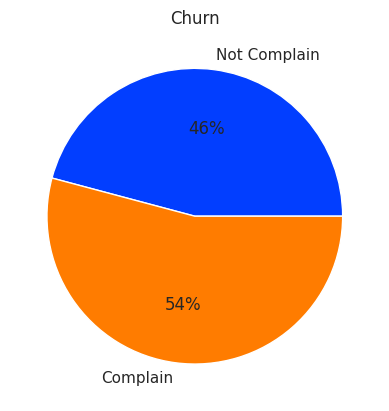

In [18]:
Churn_Complain = df.loc[(df['Churn']==1) & (df['Complain']==1)]['Churn'].count()
Churn_NotComplain = df.loc[(df['Churn']==1) & (df['Complain']==0)]['Churn'].count()
print(Churn_Complain, Churn_NotComplain)

data = [Churn_NotComplain,Churn_Complain]
labels = ['Not Complain', 'Complain']
colors = sns.color_palette('bright')[0:7]
plt.title('Churn')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Summary:  
Berdasarkan pie plot diatas dapat terlihat bahwa nilai user complain dan churn memiliki angka sebesar 54% sedangkan not complain dan churn memiliki angka sebesar 46%. maka :
1. Terdapat 54% user yang melakukan complain cenderung akan churn.
1. Terdapat 46% user yang tidak melakukan complain cenderung akan churn.


> ## Percentage Not-Churn User and Complain with pie plot

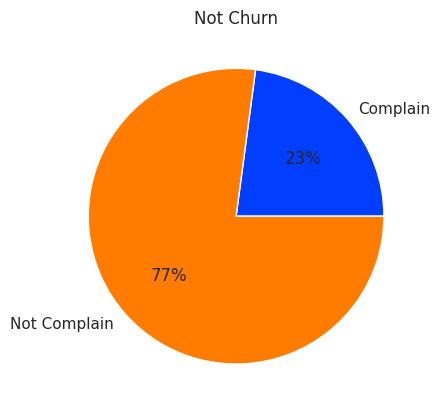

In [19]:
NotChurn_Complain = df.loc[(df['Churn']==0) & (df['Complain']==1)]['Churn'].count()
NotChurn_NotComplain = df.loc[(df['Churn']==0) & (df['Complain']==0)]['Churn'].count()
data = [NotChurn_Complain,NotChurn_NotComplain]
labels = ['Complain', 'Not Complain']
colors = sns.color_palette('bright')[0:7]
plt.title('Not Churn')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Summary:  
Berdasarkan pie plot diatas dapat terlihat bahwa nilai user complain dan tidak churn memiliki angka sebesar 23% sedangkan not complain dan not churn memiliki angka sebesar 77%. maka :
1. Terdapat 23% user yang melakukan complain cenderung tidak akan churn.
1. Terdapat 77% user yang tidak melakukan complain cenderung tidak akan churn.


Insight:  
1. Perusahaan dapat memperbaiki flow kerja dari tim CS agar dapat melayani lebih banyak user.
1. Memperbaiki proses complain pada CS agar user merasa puas atas pelayanan perusahaan.
1. Perusahaan dapat memberikan voucher promo pada user yang proses complainnya sudah berhasil diatasi.


> ## Percentage Churn User and Satisfaction Score with pie plot

In [113]:
df['SatisfactionScore'].unique()

array([3, 1, 4, 2, 5])

93 51 211 121 198


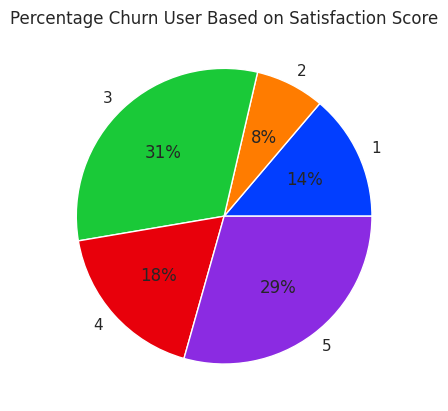

In [21]:
Churn_Satisfact1 = df.loc[(df['Churn']==1) & (df['SatisfactionScore']==1)]['Churn'].count()
Churn_Satisfact2 = df.loc[(df['Churn']==1) & (df['SatisfactionScore']==2)]['Churn'].count()
Churn_Satisfact3 = df.loc[(df['Churn']==1) & (df['SatisfactionScore']==3)]['Churn'].count()
Churn_Satisfact4 = df.loc[(df['Churn']==1) & (df['SatisfactionScore']==4)]['Churn'].count()
Churn_Satisfact5 = df.loc[(df['Churn']==1) & (df['SatisfactionScore']==5)]['Churn'].count()
print(Churn_Satisfact1, Churn_Satisfact2, Churn_Satisfact3,Churn_Satisfact4,Churn_Satisfact5)

data = [Churn_Satisfact1,Churn_Satisfact2,Churn_Satisfact3,Churn_Satisfact4,Churn_Satisfact5]
labels = ['1', '2','3','4','5']
colors = sns.color_palette('bright')[0:7]
plt.title('Percentage Churn User Based on Satisfaction Score')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Cleaning

In [115]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,33,"[17.0, 2.0]"
1,WarehouseToHome,float64,169,4.29,33,"[5.0, 33.0]"
2,NumberOfDeviceRegistered,float64,0,0.00,6,"[2.0, 5.0]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile]"
4,SatisfactionScore,int64,0,0.00,5,"[3, 1]"
5,MaritalStatus,object,0,0.00,3,"[Married, Single]"
6,NumberOfAddress,int64,0,0.00,12,"[9, 12]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,16,"[12.0, nan]"
9,CashbackAmount,float64,0,0.00,2131,"[234.96, 127.66]"


<Axes: >

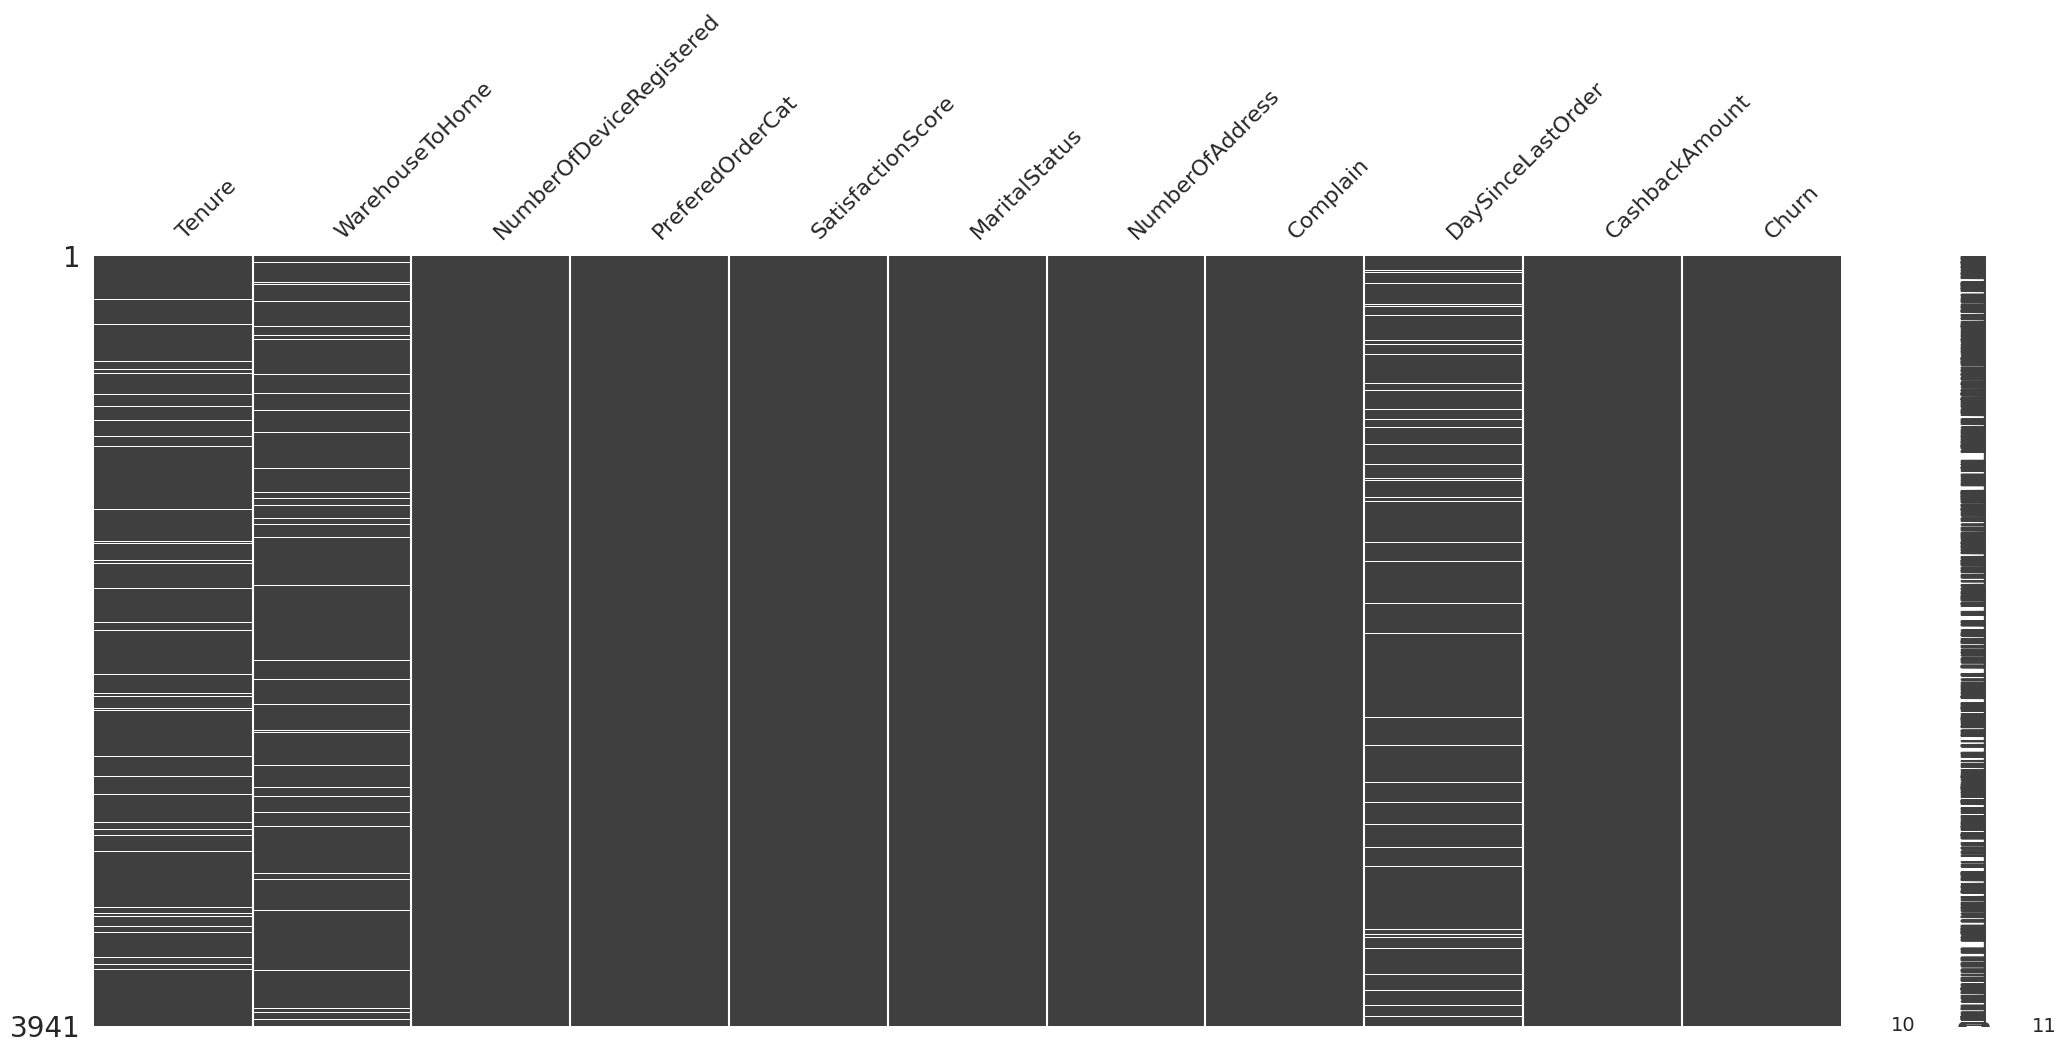

In [116]:
import missingno
missingno.matrix(df)

Tidak terdapat pola pada missing value atau dapat dikatakan missing value tersebar rata dan acak

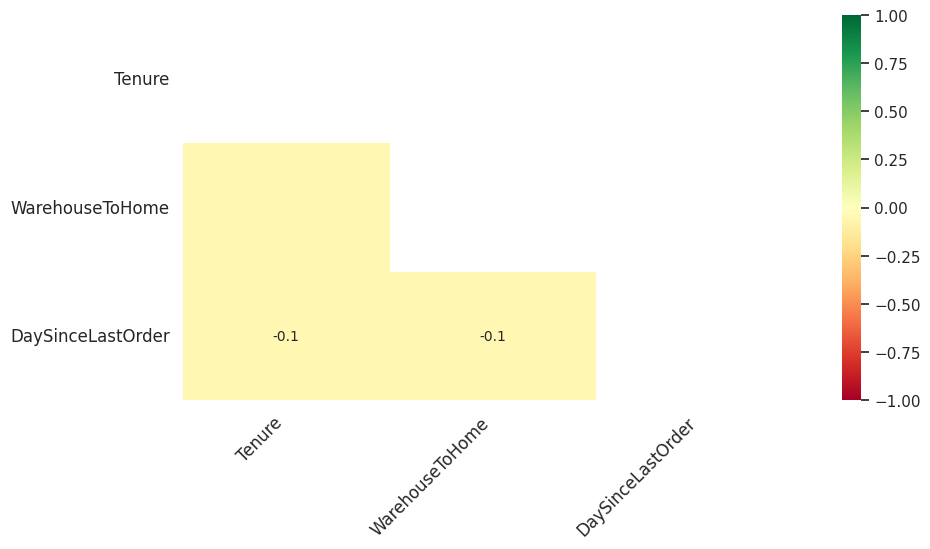

In [117]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

Tidak ada korelasi antara 3 kolom yang memiliki missing value

In [118]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [119]:
df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [120]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4.0,Laptop & Accessory,3,Single,2,0,7.0,143.320,0
1,7.0,25.0,4.0,Mobile,1,Married,2,0,7.0,129.290,0
2,27.0,13.0,3.0,Laptop & Accessory,1,Married,5,0,7.0,168.540,0
3,20.0,25.0,4.0,Fashion,3,Divorced,7,0,3.0,230.270,0
4,30.0,15.0,4.0,Others,4,Single,8,0,8.0,269.575,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5.0,Fashion,3,Married,8,0,1.0,231.860,0
3937,8.0,7.0,2.0,Mobile Phone,2,Single,4,0,4.0,157.800,0
3938,30.0,6.0,5.0,Laptop & Accessory,3,Married,3,1,2.0,156.600,0
3939,6.0,14.0,4.0,Mobile,3,Married,10,1,0.0,124.370,1


# Data Prep

In [121]:
# Encoding data string
label_encoder = LabelEncoder()
df['PreferedOrderCat'] = label_encoder.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])

# Memisahkan fitur dan label
X = df.drop('Churn', axis=1)
y = df['Churn']

# Generalisasi data dengan membagi menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleksi fitur menggunakan SelectKBest dan ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Normalisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

# Modeling & Evaluation

Hyperparameter terbaik: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Akurasi rata-rata dari cross-validation: 0.9206892561567681
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       660
           1       0.84      0.71      0.77       129

    accuracy                           0.93       789
   macro avg       0.89      0.84      0.86       789
weighted avg       0.93      0.93      0.93       789

Model cenderung overfitting


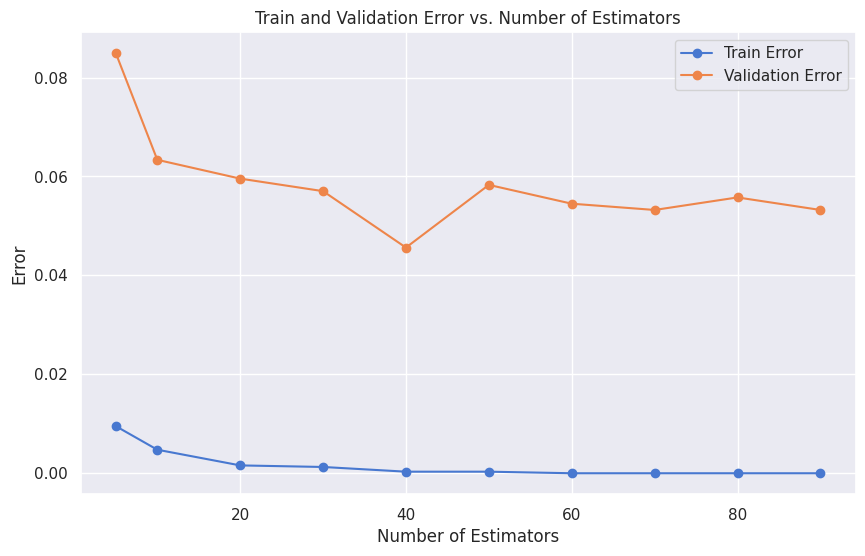

In [122]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Inisialisasi model RandomForestClassifier dengan parameter pembatasan
model = RandomForestClassifier(max_depth=10)

# Definisi hyperparameter yang akan dituning
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Melakukan hyperparameter tuning dengan GridSearchCV
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Mencetak hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Melakukan cross-validation dengan model terbaik
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5)

# Mencetak akurasi rata-rata dari cross-validation
print("Akurasi rata-rata dari cross-validation:", np.mean(cv_scores))

# Melatih model dengan data latih
grid_search.best_estimator_.fit(X_train_scaled, y_train)

# Mendapatkan prediksi pada data uji
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Evaluasi model dengan classification report
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:")
print(classification_rep)

# Cek kemungkinan overfitting atau underfitting
train_accuracy = grid_search.best_estimator_.score(X_train_scaled, y_train)
test_accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
if train_accuracy > test_accuracy:
    print("Model cenderung overfitting")
elif train_accuracy < test_accuracy:
    print("Model cenderung underfitting")
else:
    print("Model memiliki kinerja yang seimbang")

# Plot kurva train and validation fitting
train_errors = []
validation_errors = []
n_estimators_range = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    train_errors.append(1 - model.score(X_train, y_train))
    validation_errors.append(1 - model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Train Error', marker='o')
plt.plot(n_estimators_range, validation_errors, label='Validation Error', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Train and Validation Error vs. Number of Estimators')
plt.legend()
plt.show()


In [99]:
# Mendapatkan fitur-fitur yang memiliki pengaruh signifikan
feature_importances = grid_search.best_estimator_.feature_importances_

# Mengurutkan fitur berdasarkan tingkat kepentingannya
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

# Menampilkan 3 fitur dengan nilai signifikansi tertinggi
n_top_features = 3  # Jumlah top fitur yang ingin ditampilkan
top_features = sorted_features[:n_top_features]
top_importances = feature_importances[sorted_indices][:n_top_features]
print(f"{n_top_features} Fitur dengan nilai signifikansi tertinggi:")
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")


3 Fitur dengan nilai signifikansi tertinggi:
Tenure: 0.2898235463323844
CashbackAmount: 0.1552076487092041
WarehouseToHome: 0.09542499375055331


Penjelasan:

1. Perlu dilakukan proses encoding terlebih dahulu pada fitur kategorikal PreferedOrderCat dan MaritalStatus menggunakan LabelEncoder.
2. Fitur dan label dipisahkan menjadi variabel X dan y.
3. Data dibagi menjadi data latih dan data uji menggunakan train_test_split.
Seleksi fitur dilakukan dengan menggunakan SelectKBest dan ANOVA F-value untuk memilih fitur terbaik.
4. Dilakukan normalisasi fitur dengan StandardScaler.
5. Model yang digunakan adalah RandomForestClassifier dengan parameter pembatasan max_depth=10.
6. Hyperparameter tuning dilakukan dengan menggunakan GridSearchCV untuk mencari kombinasi hyperparameter terbaik.
7. Cross-validation dilakukan dengan cross_val_score untuk menghitung akurasi rata-rata dari cross-validation.
8. Model dengan hyperparameter terbaik dilatih menggunakan data latih.
9. Dilakukan prediksi pada data uji, dan dilakukan evaluasi model menggunakan classification_report untuk mendapatkan laporan klasifikasi.
10. Dilakukan pengecekan untuk menentukan apakah model cenderung overfitting, underfitting, atau memiliki kinerja yang seimbang berdasarkan akurasi pada data latih dan data uji.

Berdasarkan hasil learning diatas dapat dilihat bahwa model masih cenderung overfitting. Hal ini mungkin saja terjadi karena kualitas data yang dimiliki saat ini. Dapat dilihat pada pie chart diatas bahwa persentase not-churn adalah 83% sedangkan churn 17%. Hal ini dapat membuat hasil pembelajaran menjadi kurang akurat. Karena data sample not-churn lebih besar dari pada data sample churn.